# DL-TDDFT Test

## DL-$h_{eff}(t)$ mapping test $h(t) \rightarrow h_{eff}(t)$

### Test the prediction of the model

#### Imports

In [1]:
import torch
import numpy as np
from numpy.fft import fft,ifft
import matplotlib.pyplot as plt
import torch
from tqdm import trange, tqdm
from typing import List


In [ ]:
data=np.load('data/dataset_h_eff/train_dataset_fourier_format_240301_ndata_60000.npz')

h=data['h']
potential=data['potential']

new_h=h[:,:,:101]
new_potential=potential[:,:,:101]

np.savez('data/dataset_h_eff/train_dataset_fourier_format_half_spectrum_ndata_60000.npz',h=new_h,potential=new_potential)



#### Parameters

In [2]:
data_fourier=np.load('data/dataset_h_eff/train_dataset_fourier_format_240229_ndata_20000.npz')

nbatch=100

h_fft=data_fourier['h']
h_eff_fft=data_fourier['potential']

h_fft_torch=torch.tensor(h_fft[:nbatch,:,:101])

model=torch.load('model_rep/kohm_sham/cnn_field2field/REDENT2D_fourier_field2field_time_steps_200_tf_20_240327_dataset_60k_[80, 80, 80]_hc_[15, 5]_ks_1_ps_3_nconv_1_nblock',map_location='cpu')
model.eval()



REDENT2D(
  (conv_downsample): ModuleList(
    (0): Sequential(
      (conv1): Conv2d(2, 80, kernel_size=(15, 5), stride=(1, 1), padding=(7, 2), padding_mode=circular)
      (batch_norm 1): BatchNorm2d(80, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activation 1): GELU(approximate='none')
      (conv_1_1): Conv2d(80, 80, kernel_size=(15, 5), stride=(1, 1), padding=(7, 2), padding_mode=circular)
      (batch_norm 1_1): BatchNorm2d(80, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activation_1_1): GELU(approximate='none')
      (pooling 1): AvgPool2d(kernel_size=[2, 1], stride=[2, 1], padding=0)
    )
    (1): Sequential(
      (conv2): Conv2d(80, 80, kernel_size=(15, 5), stride=(1, 1), padding=(7, 2), padding_mode=circular)
      (activation 2): GELU(approximate='none')
      (conv_2_1): Conv2d(80, 80, kernel_size=(15, 5), stride=(1, 1), padding=(7, 2), padding_mode=circular)
      (activation_2_1): GELU(approximate='none')
      (pool

In [3]:
output=model(h_fft_torch).detach().numpy()

symmetric_part=np.flip(output[:,:,1:-1],axis=-2)

h_eff_fft_reconstruction=np.append(output,symmetric_part,axis=-2)
print(h_eff_fft_reconstruction.shape)

h_eff_fft_reconstruction[:,1,100:]=-1*h_eff_fft_reconstruction[:,1,100:]


(100, 2, 200, 8)


#### Test in the fourier space

(20000, 2, 200, 8)


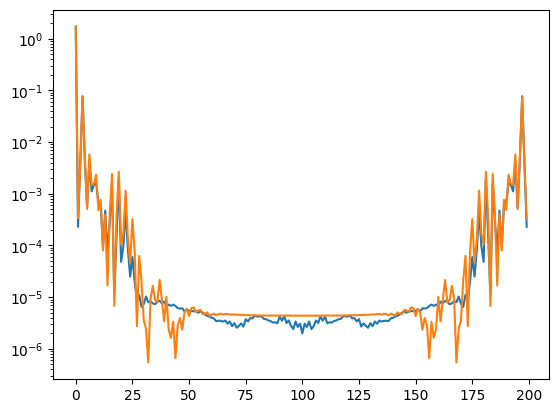

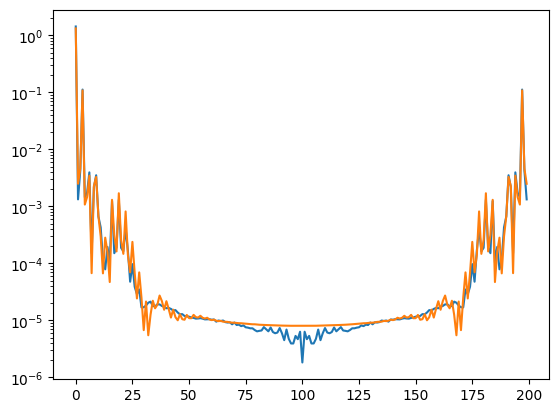

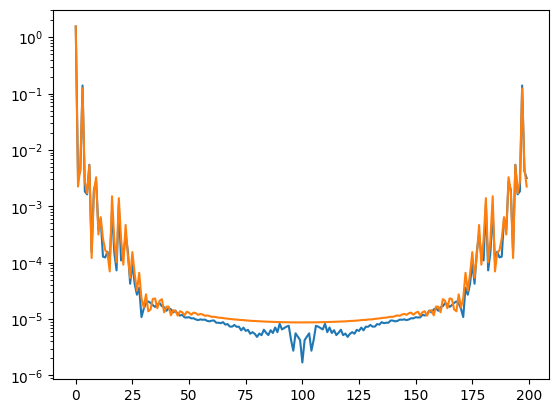

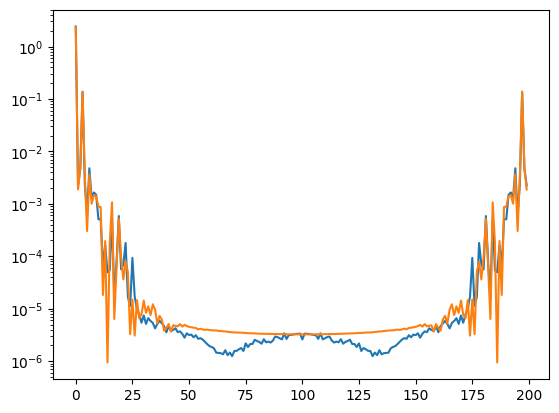

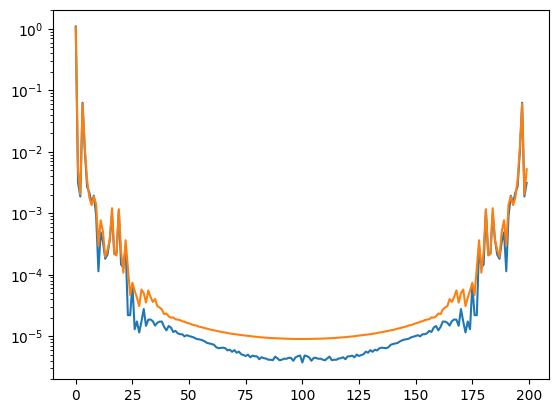

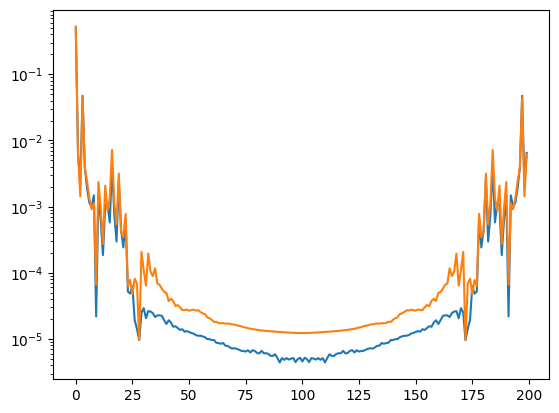

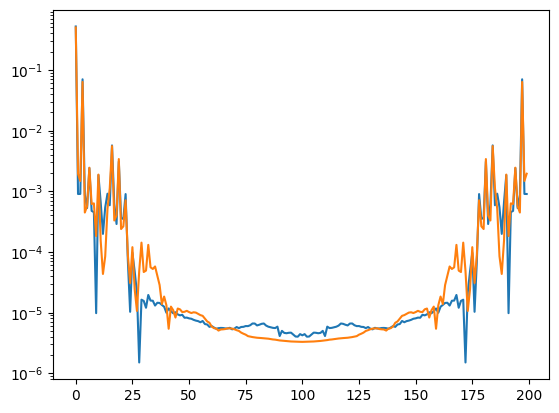

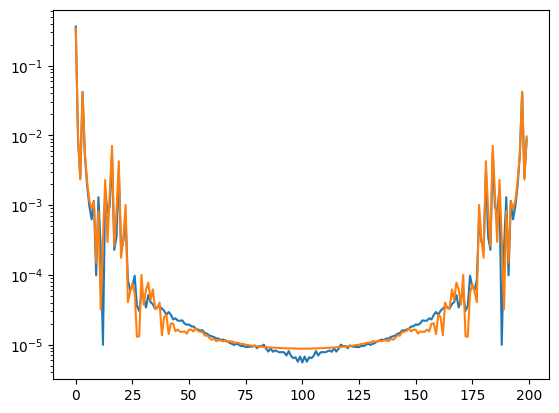

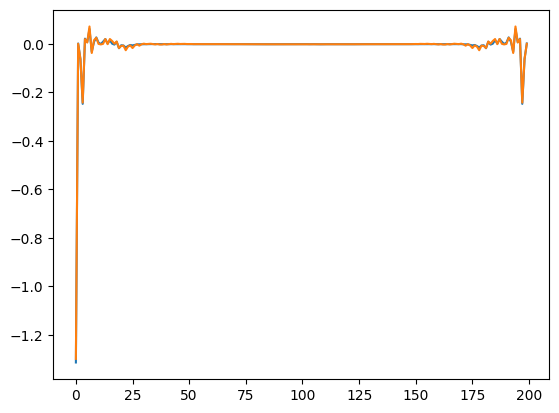

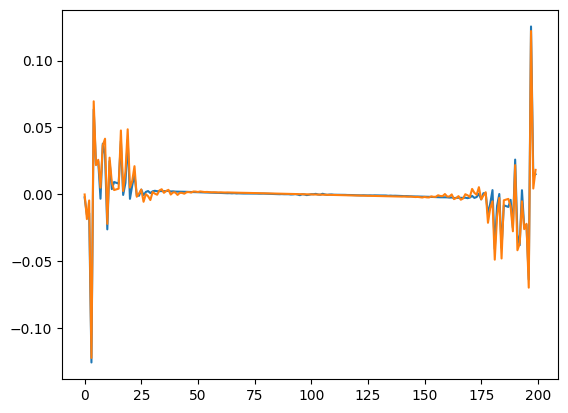

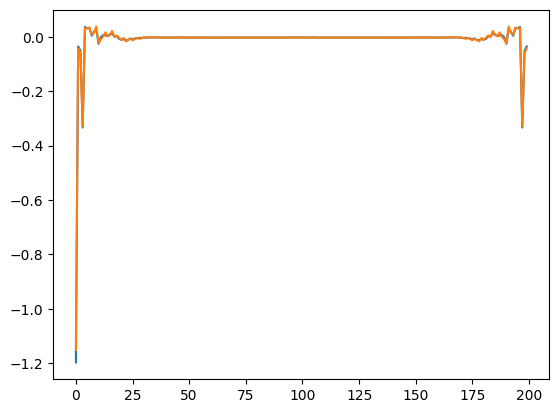

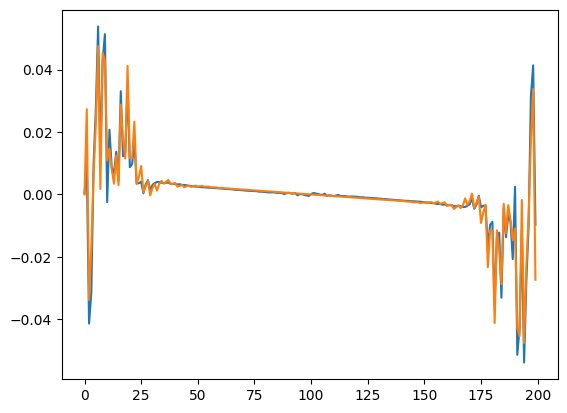

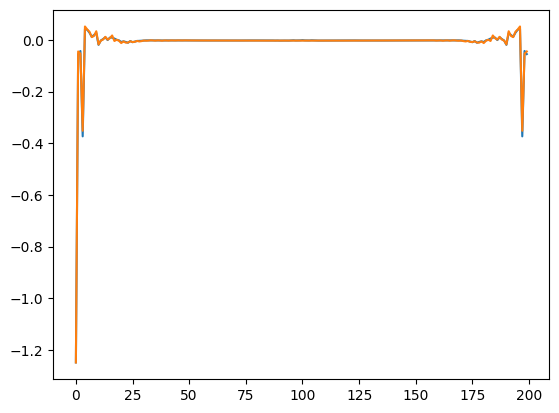

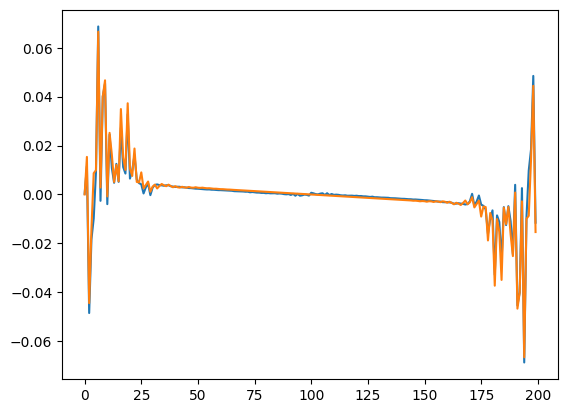

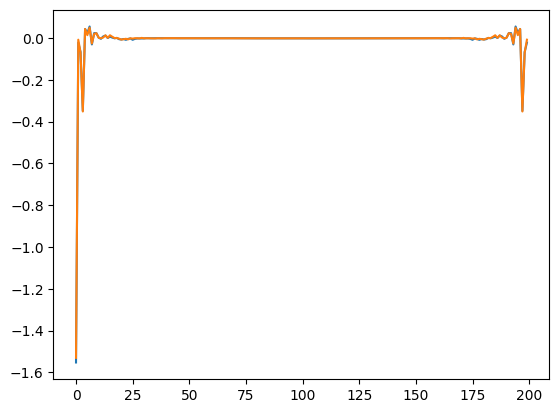

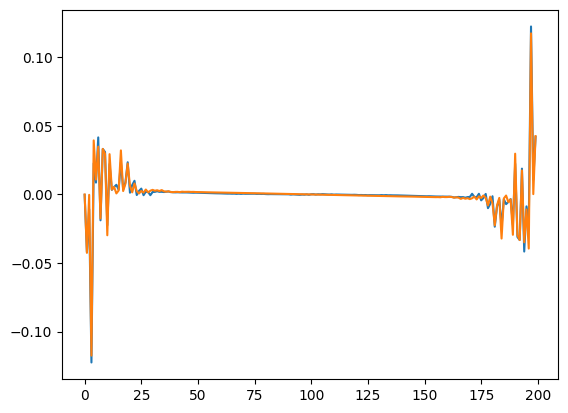

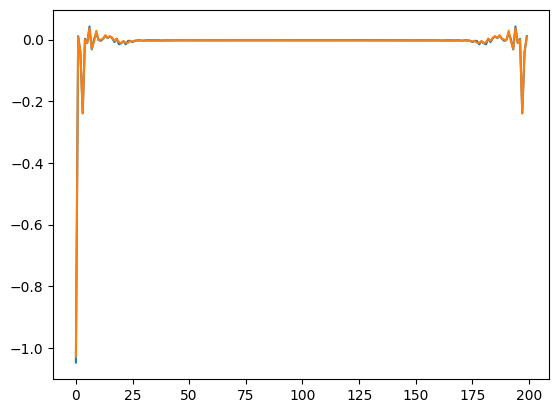

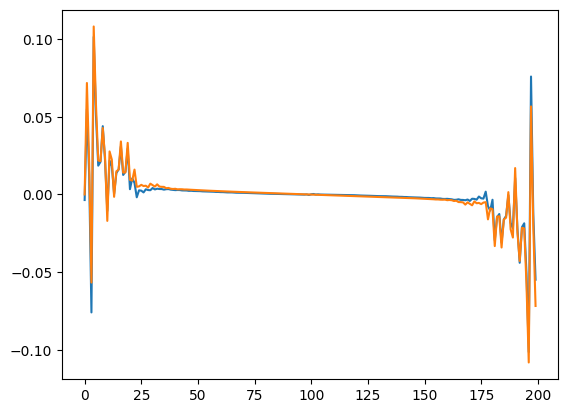

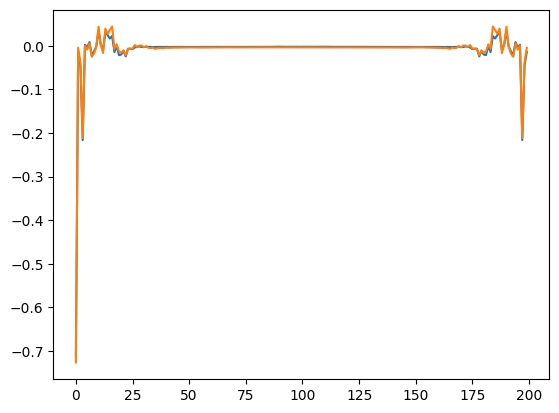

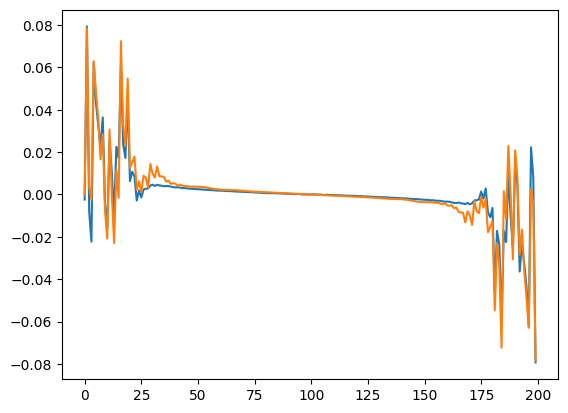

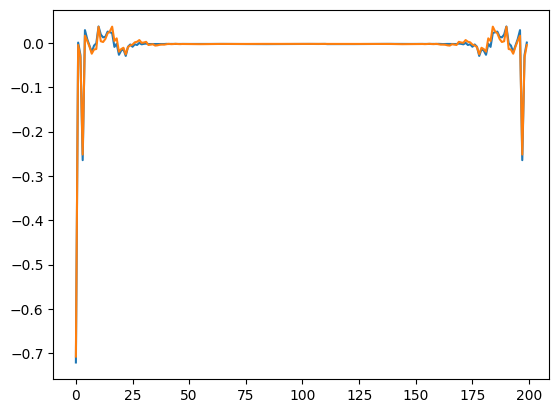

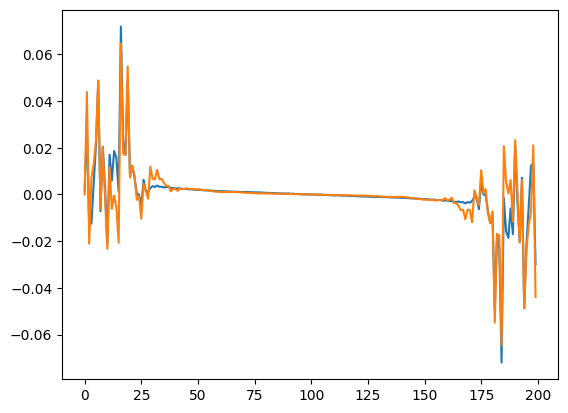

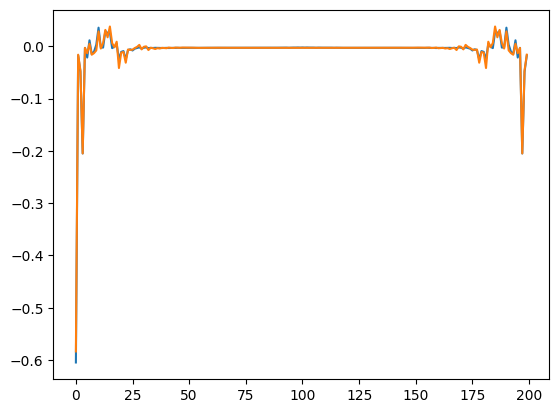

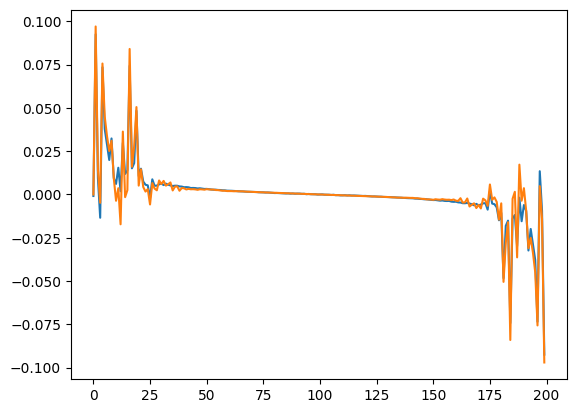

In [6]:
idx=np.random.randint(0,nbatch)
print(h_eff_fft.shape)
for i in range(h_eff_fft.shape[-1]):
    
    plt.plot(h_eff_fft_reconstruction[idx,0,:,i]**2+h_eff_fft_reconstruction[idx,1,:,i]**2)
    plt.plot(h_eff_fft[idx,0,:,i]**2+h_eff_fft[idx,1,:,i]**2)
    plt.semilogy()
    plt.show()
    
for i in range(h_eff_fft.shape[-1]):
    
    plt.plot(h_eff_fft_reconstruction[idx,0,:,i])
    plt.plot(h_eff_fft[idx,0,:,i])
    plt.show()

    plt.plot(h_eff_fft_reconstruction[idx,1,:,i])
    plt.plot(h_eff_fft[idx,1,:,i])
    plt.show()



#### (Optional) Fourier filter

In [13]:
h_eff_fft_reconstruction_filter=h_eff_fft_reconstruction.copy()
h_eff_fft_reconstruction_filter[:,:,40:-40]=0.
h_eff_reconstruction_filter=ifft(h_eff_fft_reconstruction_filter[:,0]+1j*h_eff_fft_reconstruction_filter[:,1],norm='forward',axis=1)


#### Test in the time space

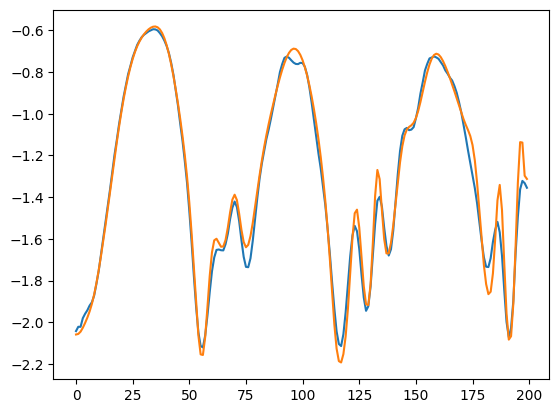

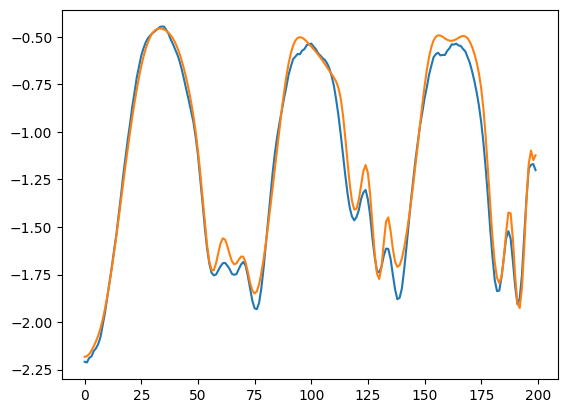

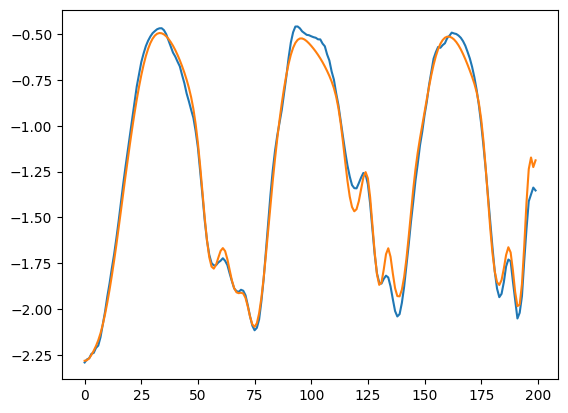

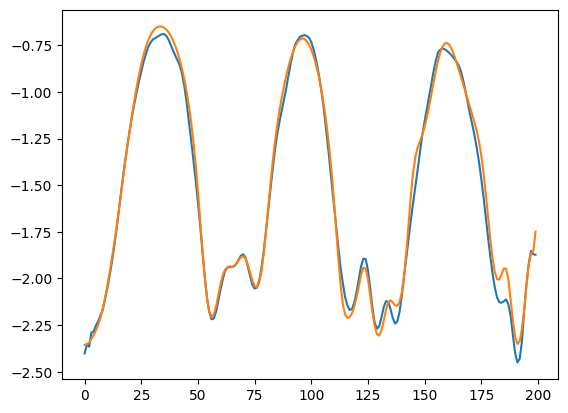

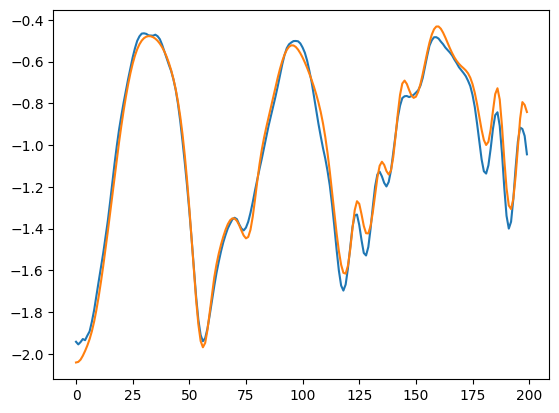

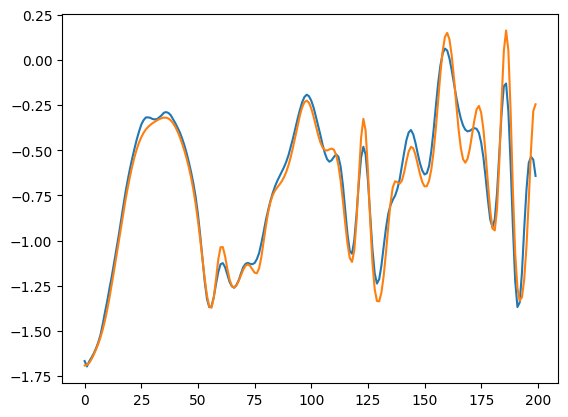

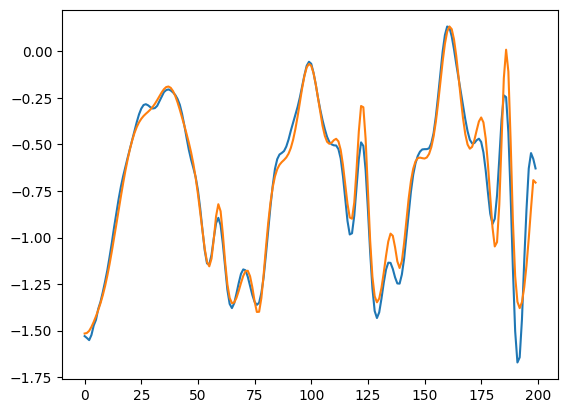

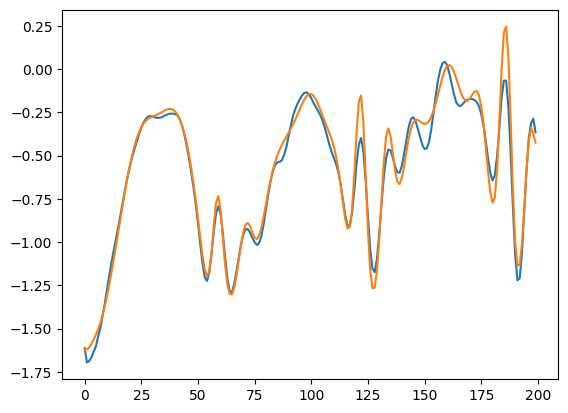

In [7]:

h_eff_reconstruction=ifft(h_eff_fft_reconstruction[:,0]+1j*h_eff_fft_reconstruction[:,1],norm='forward',axis=1)


h_eff=ifft(h_eff_fft[:,0]+1j*h_eff_fft[:,1],norm='forward',axis=1)



for i in range(h_eff.shape[-1]):
    plt.plot(h_eff_reconstruction[idx,:,i])
   # plt.plot(h_eff_reconstruction_filter[idx,:,i])
    plt.plot(h_eff[idx,:,i])
    plt.show()
    



#### (Optional) Reconstruction filter

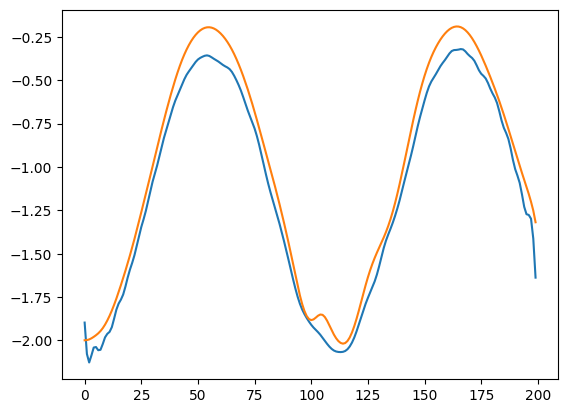

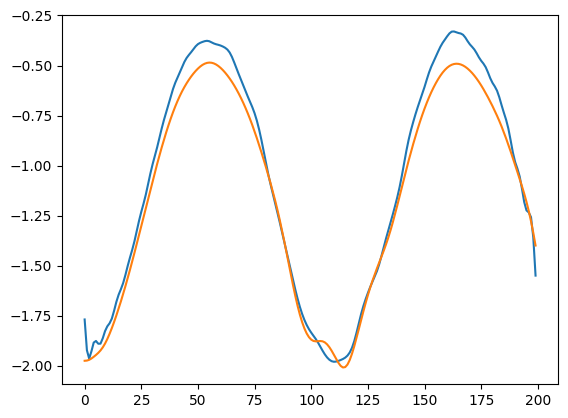

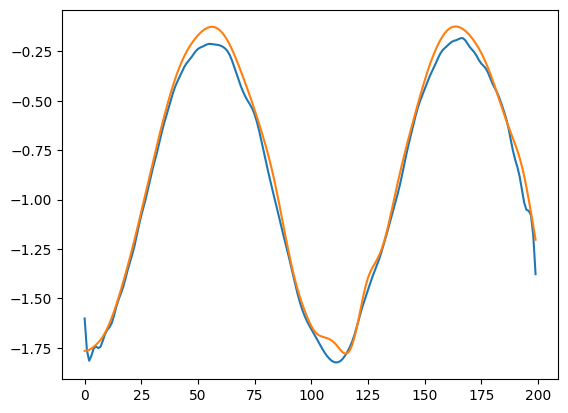

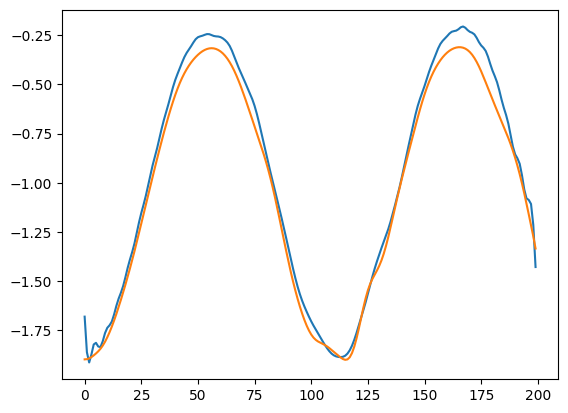

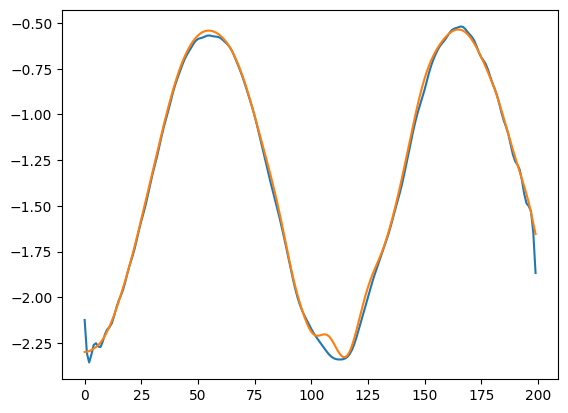

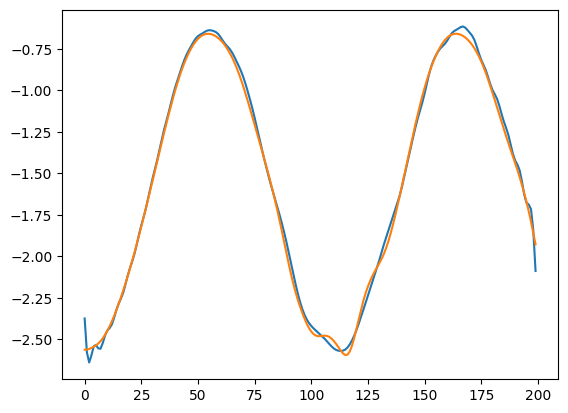

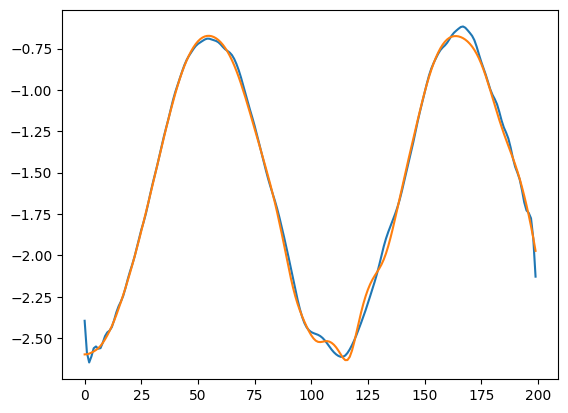

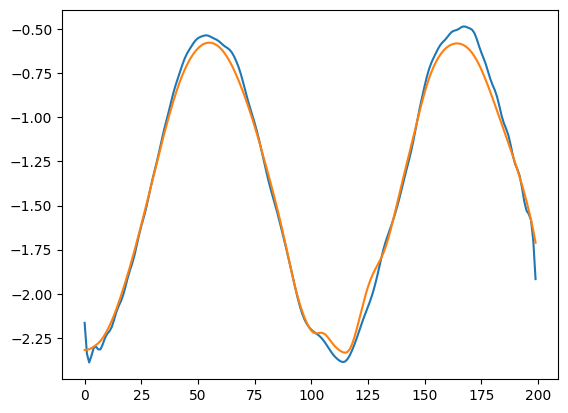

In [10]:

for i in range(h_eff.shape[-1]):
    #plt.plot(h_eff_reconstruction[idx,:,i])
    plt.plot(h_eff_reconstruction_filter[idx,:,i])
    plt.plot(h_eff[idx,:,i])
    plt.show()
    